In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Case Study 1 - Dataset - Personal Loan Propensity.csv")

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,MALE,11/05/1967,516002,12,OWNED,MO,1,29800,23000,...,2,0,200000,23000.0,0,0,0,0,1,0
1,2,MALE,05/02/1988,517501,12,OWNED,MC,1,73502,40000,...,1,0,0,40000.0,500000,0,1,4,7,0
2,3,MALE,01/08/1970,516003,18,RENT,SC,2,46180,30000,...,1,0,30000,30000.0,0,1,0,0,0,0
3,4,MALE,22/05/1972,517213,18,OWNED,MO,2,29800,22100,...,2,0,42000,49900.0,0,0,0,2,6,0
4,5,FEMALE,12/04/1983,517503,12,OWNED,MO,2,29800,18500,...,1,0,15000,18500.0,0,0,0,0,0,0


In [4]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32'],
      dtype='object')

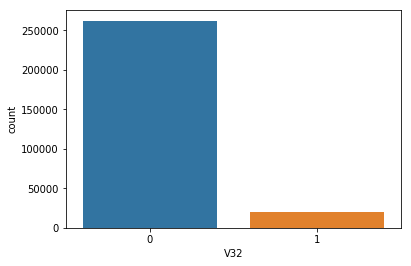

In [130]:
sns.countplot(x="V32", data=df)
df["V32"].value_counts()
plt.savefig("Baseline.png",dpi=600)

In [6]:
baseline =  262356/282924 
baseline

0.9273020316410061

In [7]:
import datetime as DT
now = pd.Timestamp('now')

df["V3"] = pd.to_datetime(df["V3"])
df['V3'] = df['V3'].where(df['V3'] < now, df['V3'] -  np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['V3']).astype('<m8[Y]')    # 3
print(df[["age","V3"]].head())
df.columns

    age         V3
0  52.0 1967-11-05
1  31.0 1988-05-02
2  49.0 1970-01-08
3  47.0 1972-05-22
4  35.0 1983-12-04


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'age'],
      dtype='object')

In [8]:
lst_quant = df.select_dtypes(include="number")
lst_quant.columns

Index(['V1', 'V4', 'V5', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'V29', 'V30', 'V31', 'V32', 'age'],
      dtype='object')

In [9]:
lst_categorical = df.select_dtypes(include="object")
lst_categorical.columns

Index(['V2', 'V6', 'V7', 'V11', 'V12'], dtype='object')

In [10]:
for item in lst_categorical:
    print(item)
    print(df[item].value_counts())

V2
MALE      240846
FEMALE     42078
Name: V2, dtype: int64
V6
OWNED               248151
RENT                 34170
OWENED BY OFFICE       603
Name: V6, dtype: int64
V7
SC    109052
MC     92819
MO     81053
Name: V7, dtype: int64
V11
M    202469
F     56061
L     24394
Name: V11, dtype: int64
V12
NON-CASH    195894
CASH         87030
Name: V12, dtype: int64


In [11]:
sex = pd.get_dummies(df["V2"],drop_first=True)
sex.head(3)

,MALE
0,1
1,1
2,1


In [12]:
residence = pd.get_dummies(df["V6"])
residence.head(3)

,OWENED BY OFFICE,OWNED,RENT
0,0,1,0
1,0,1,0
2,0,0,1


In [13]:
product = pd.get_dummies(df["V7"])
product.head(3)

,MC,MO,SC
0,0,1,0
1,1,0,0
2,0,0,1


In [14]:
loan_type = pd.get_dummies(df["V11"])
loan_type.head(3)

,F,L,M
0,0,0,1
1,0,0,1
2,0,0,1


In [15]:
payment = pd.get_dummies(df["V12"],drop_first=True)
payment.head(3)

,NON-CASH
0,1
1,1
2,1


In [16]:
df = df.drop(["V1","V2","V3","V4","V6","V7","V11","V12"],axis=1)
df.columns

Index(['V5', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'V29', 'V30', 'V31', 'V32', 'age'],
      dtype='object')

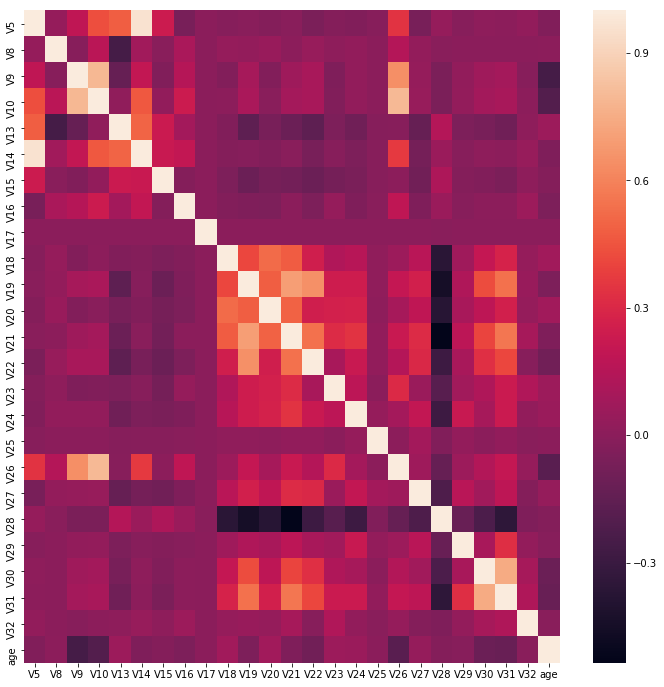

In [17]:
lst_quant = df.select_dtypes(include="number")
plt.subplots(figsize=(12,12))
sns.heatmap(lst_quant.corr())

In [18]:
df =pd.concat([df,sex,residence,product,loan_type,payment],axis=1)
df.head()

,V5,V8,V9,V10,V13,V14,V15,V16,V17,V18,...,OWENED BY OFFICE,OWNED,RENT,MC,MO,SC,F,L,M,NON-CASH
0,12,1,29800,23000,8.99,12,0,0,12500.0,1,...,0,1,0,0,1,0,0,0,1,1
1,12,1,73502,40000,6.99,12,0,0,25000.0,2,...,0,1,0,1,0,0,0,0,1,1
2,18,2,46180,30000,8.99,18,0,0,44000.0,0,...,0,0,1,0,0,1,0,0,1,1
3,18,2,29800,22100,8.99,18,0,0,15000.0,2,...,0,1,0,0,1,0,0,0,1,1
4,12,2,29800,18500,6.99,12,0,0,35001.0,0,...,0,1,0,0,1,0,0,0,1,1


In [19]:
df.columns

Index(['V5', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'V29', 'V30', 'V31', 'V32', 'age', 'MALE', 'OWENED BY OFFICE', 'OWNED',
       'RENT', 'MC', 'MO', 'SC', 'F', 'L', 'M', 'NON-CASH'],
      dtype='object')

In [20]:
len(df.select_dtypes(include="object").columns)

0

In [21]:
len(df.select_dtypes(include="number").columns)

36

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve,roc_auc_score

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
y = df["V32"]
X = df.drop(["V32"],axis=1)

In [25]:
X.columns

Index(['V5', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'V29', 'V30', 'V31', 'age', 'MALE', 'OWENED BY OFFICE', 'OWNED', 'RENT',
       'MC', 'MO', 'SC', 'F', 'L', 'M', 'NON-CASH'],
      dtype='object')

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [27]:
log_model = LogisticRegression(verbose=True)

In [28]:
log_model.fit(x_train,y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=True, warm_start=False)

In [132]:
prediction = log_model.predict(x_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96     78632
          1       0.00      0.00      0.00      6246

avg / total       0.86      0.93      0.89     84878



C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
print(accuracy_score(prediction,y_test))

0.9264120266735786


In [32]:
print(roc_auc_score(y_test,prediction))

0.5


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc_model =RandomForestClassifier(n_estimators=1000,max_depth=10)

In [38]:
rfc_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
rfc_prediction = rfc_model.predict(x_test)

In [40]:
print(classification_report(y_test,rfc_prediction))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96     78632
          1       0.00      0.00      0.00      6246

avg / total       0.86      0.93      0.89     84878



C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
print(accuracy_score(rfc_prediction,y_test))

0.9264120266735786


In [42]:
print(roc_auc_score(y_test,rfc_prediction))

0.5


In [43]:
from lightgbm import LGBMClassifier

In [44]:
model = LGBMClassifier(learning_rate=8e-2, n_estimators=3000).fit(x_train, y_train, eval_set=[(x_test, y_test)])

[1]	valid_0's binary_logloss: 0.259434
[2]	valid_0's binary_logloss: 0.256875
[3]	valid_0's binary_logloss: 0.254405
[4]	valid_0's binary_logloss: 0.25273
[5]	valid_0's binary_logloss: 0.251119
[6]	valid_0's binary_logloss: 0.249749
[7]	valid_0's binary_logloss: 0.248589
[8]	valid_0's binary_logloss: 0.247608
[9]	valid_0's binary_logloss: 0.246666
[10]	valid_0's binary_logloss: 0.245928
[11]	valid_0's binary_logloss: 0.245196
[12]	valid_0's binary_logloss: 0.244635
[13]	valid_0's binary_logloss: 0.244011
[14]	valid_0's binary_logloss: 0.243457
[15]	valid_0's binary_logloss: 0.242943
[16]	valid_0's binary_logloss: 0.242561
[17]	valid_0's binary_logloss: 0.242167
[18]	valid_0's binary_logloss: 0.241792
[19]	valid_0's binary_logloss: 0.24147
[20]	valid_0's binary_logloss: 0.24112
[21]	valid_0's binary_logloss: 0.240665
[22]	valid_0's binary_logloss: 0.240326
[23]	valid_0's binary_logloss: 0.239985
[24]	valid_0's binary_logloss: 0.239703
[25]	valid_0's binary_logloss: 0.239492
[26]	valid_0

[212]	valid_0's binary_logloss: 0.234925
[213]	valid_0's binary_logloss: 0.234923
[214]	valid_0's binary_logloss: 0.234907
[215]	valid_0's binary_logloss: 0.234915
[216]	valid_0's binary_logloss: 0.234902
[217]	valid_0's binary_logloss: 0.234912
[218]	valid_0's binary_logloss: 0.234911
[219]	valid_0's binary_logloss: 0.234898
[220]	valid_0's binary_logloss: 0.234894
[221]	valid_0's binary_logloss: 0.234918
[222]	valid_0's binary_logloss: 0.234926
[223]	valid_0's binary_logloss: 0.234935
[224]	valid_0's binary_logloss: 0.234947
[225]	valid_0's binary_logloss: 0.234936
[226]	valid_0's binary_logloss: 0.234936
[227]	valid_0's binary_logloss: 0.234915
[228]	valid_0's binary_logloss: 0.234912
[229]	valid_0's binary_logloss: 0.234914
[230]	valid_0's binary_logloss: 0.234911
[231]	valid_0's binary_logloss: 0.234909
[232]	valid_0's binary_logloss: 0.234908
[233]	valid_0's binary_logloss: 0.23492
[234]	valid_0's binary_logloss: 0.234931
[235]	valid_0's binary_logloss: 0.234944
[236]	valid_0's b

[414]	valid_0's binary_logloss: 0.235406
[415]	valid_0's binary_logloss: 0.235402
[416]	valid_0's binary_logloss: 0.2354
[417]	valid_0's binary_logloss: 0.235405
[418]	valid_0's binary_logloss: 0.235401
[419]	valid_0's binary_logloss: 0.235408
[420]	valid_0's binary_logloss: 0.235417
[421]	valid_0's binary_logloss: 0.235414
[422]	valid_0's binary_logloss: 0.235429
[423]	valid_0's binary_logloss: 0.23542
[424]	valid_0's binary_logloss: 0.235431
[425]	valid_0's binary_logloss: 0.235449
[426]	valid_0's binary_logloss: 0.235475
[427]	valid_0's binary_logloss: 0.235475
[428]	valid_0's binary_logloss: 0.235473
[429]	valid_0's binary_logloss: 0.235458
[430]	valid_0's binary_logloss: 0.235468
[431]	valid_0's binary_logloss: 0.235481
[432]	valid_0's binary_logloss: 0.235486
[433]	valid_0's binary_logloss: 0.235481
[434]	valid_0's binary_logloss: 0.235481
[435]	valid_0's binary_logloss: 0.23549
[436]	valid_0's binary_logloss: 0.235483
[437]	valid_0's binary_logloss: 0.235482
[438]	valid_0's bina

[617]	valid_0's binary_logloss: 0.236021
[618]	valid_0's binary_logloss: 0.23603
[619]	valid_0's binary_logloss: 0.236037
[620]	valid_0's binary_logloss: 0.236051
[621]	valid_0's binary_logloss: 0.23604
[622]	valid_0's binary_logloss: 0.236045
[623]	valid_0's binary_logloss: 0.236034
[624]	valid_0's binary_logloss: 0.236042
[625]	valid_0's binary_logloss: 0.236042
[626]	valid_0's binary_logloss: 0.23605
[627]	valid_0's binary_logloss: 0.236051
[628]	valid_0's binary_logloss: 0.236055
[629]	valid_0's binary_logloss: 0.236054
[630]	valid_0's binary_logloss: 0.236062
[631]	valid_0's binary_logloss: 0.236056
[632]	valid_0's binary_logloss: 0.236054
[633]	valid_0's binary_logloss: 0.23605
[634]	valid_0's binary_logloss: 0.236043
[635]	valid_0's binary_logloss: 0.236027
[636]	valid_0's binary_logloss: 0.236033
[637]	valid_0's binary_logloss: 0.236035
[638]	valid_0's binary_logloss: 0.236033
[639]	valid_0's binary_logloss: 0.236041
[640]	valid_0's binary_logloss: 0.236048
[641]	valid_0's bina

[829]	valid_0's binary_logloss: 0.236908
[830]	valid_0's binary_logloss: 0.236919
[831]	valid_0's binary_logloss: 0.236923
[832]	valid_0's binary_logloss: 0.236914
[833]	valid_0's binary_logloss: 0.236924
[834]	valid_0's binary_logloss: 0.236931
[835]	valid_0's binary_logloss: 0.236935
[836]	valid_0's binary_logloss: 0.236934
[837]	valid_0's binary_logloss: 0.236939
[838]	valid_0's binary_logloss: 0.236942
[839]	valid_0's binary_logloss: 0.236948
[840]	valid_0's binary_logloss: 0.236946
[841]	valid_0's binary_logloss: 0.236951
[842]	valid_0's binary_logloss: 0.236951
[843]	valid_0's binary_logloss: 0.236959
[844]	valid_0's binary_logloss: 0.236966
[845]	valid_0's binary_logloss: 0.236974
[846]	valid_0's binary_logloss: 0.236985
[847]	valid_0's binary_logloss: 0.236981
[848]	valid_0's binary_logloss: 0.236977
[849]	valid_0's binary_logloss: 0.236975
[850]	valid_0's binary_logloss: 0.236974
[851]	valid_0's binary_logloss: 0.236968
[852]	valid_0's binary_logloss: 0.236968
[853]	valid_0's 

[1029]	valid_0's binary_logloss: 0.237775
[1030]	valid_0's binary_logloss: 0.237779
[1031]	valid_0's binary_logloss: 0.237792
[1032]	valid_0's binary_logloss: 0.237805
[1033]	valid_0's binary_logloss: 0.237812
[1034]	valid_0's binary_logloss: 0.237813
[1035]	valid_0's binary_logloss: 0.237825
[1036]	valid_0's binary_logloss: 0.237828
[1037]	valid_0's binary_logloss: 0.237832
[1038]	valid_0's binary_logloss: 0.237823
[1039]	valid_0's binary_logloss: 0.237826
[1040]	valid_0's binary_logloss: 0.237822
[1041]	valid_0's binary_logloss: 0.237832
[1042]	valid_0's binary_logloss: 0.237841
[1043]	valid_0's binary_logloss: 0.237841
[1044]	valid_0's binary_logloss: 0.237831
[1045]	valid_0's binary_logloss: 0.237832
[1046]	valid_0's binary_logloss: 0.237836
[1047]	valid_0's binary_logloss: 0.237844
[1048]	valid_0's binary_logloss: 0.237859
[1049]	valid_0's binary_logloss: 0.237853
[1050]	valid_0's binary_logloss: 0.237851
[1051]	valid_0's binary_logloss: 0.237857
[1052]	valid_0's binary_logloss: 0

[1233]	valid_0's binary_logloss: 0.238954
[1234]	valid_0's binary_logloss: 0.238953
[1235]	valid_0's binary_logloss: 0.238954
[1236]	valid_0's binary_logloss: 0.238964
[1237]	valid_0's binary_logloss: 0.238967
[1238]	valid_0's binary_logloss: 0.238981
[1239]	valid_0's binary_logloss: 0.238978
[1240]	valid_0's binary_logloss: 0.238978
[1241]	valid_0's binary_logloss: 0.238977
[1242]	valid_0's binary_logloss: 0.238993
[1243]	valid_0's binary_logloss: 0.238994
[1244]	valid_0's binary_logloss: 0.238997
[1245]	valid_0's binary_logloss: 0.239005
[1246]	valid_0's binary_logloss: 0.239011
[1247]	valid_0's binary_logloss: 0.239019
[1248]	valid_0's binary_logloss: 0.239015
[1249]	valid_0's binary_logloss: 0.239021
[1250]	valid_0's binary_logloss: 0.239023
[1251]	valid_0's binary_logloss: 0.239021
[1252]	valid_0's binary_logloss: 0.239017
[1253]	valid_0's binary_logloss: 0.239023
[1254]	valid_0's binary_logloss: 0.23902
[1255]	valid_0's binary_logloss: 0.239028
[1256]	valid_0's binary_logloss: 0.

[1439]	valid_0's binary_logloss: 0.240084
[1440]	valid_0's binary_logloss: 0.24009
[1441]	valid_0's binary_logloss: 0.240098
[1442]	valid_0's binary_logloss: 0.240102
[1443]	valid_0's binary_logloss: 0.240111
[1444]	valid_0's binary_logloss: 0.240123
[1445]	valid_0's binary_logloss: 0.240132
[1446]	valid_0's binary_logloss: 0.240134
[1447]	valid_0's binary_logloss: 0.240135
[1448]	valid_0's binary_logloss: 0.240137
[1449]	valid_0's binary_logloss: 0.240145
[1450]	valid_0's binary_logloss: 0.240155
[1451]	valid_0's binary_logloss: 0.240166
[1452]	valid_0's binary_logloss: 0.240171
[1453]	valid_0's binary_logloss: 0.240183
[1454]	valid_0's binary_logloss: 0.240184
[1455]	valid_0's binary_logloss: 0.240199
[1456]	valid_0's binary_logloss: 0.240198
[1457]	valid_0's binary_logloss: 0.240207
[1458]	valid_0's binary_logloss: 0.240207
[1459]	valid_0's binary_logloss: 0.24022
[1460]	valid_0's binary_logloss: 0.240223
[1461]	valid_0's binary_logloss: 0.240233
[1462]	valid_0's binary_logloss: 0.2

[1639]	valid_0's binary_logloss: 0.241201
[1640]	valid_0's binary_logloss: 0.241203
[1641]	valid_0's binary_logloss: 0.24121
[1642]	valid_0's binary_logloss: 0.241222
[1643]	valid_0's binary_logloss: 0.241218
[1644]	valid_0's binary_logloss: 0.241209
[1645]	valid_0's binary_logloss: 0.241222
[1646]	valid_0's binary_logloss: 0.241212
[1647]	valid_0's binary_logloss: 0.24121
[1648]	valid_0's binary_logloss: 0.24121
[1649]	valid_0's binary_logloss: 0.241221
[1650]	valid_0's binary_logloss: 0.241232
[1651]	valid_0's binary_logloss: 0.241246
[1652]	valid_0's binary_logloss: 0.241238
[1653]	valid_0's binary_logloss: 0.241247
[1654]	valid_0's binary_logloss: 0.241255
[1655]	valid_0's binary_logloss: 0.241271
[1656]	valid_0's binary_logloss: 0.241283
[1657]	valid_0's binary_logloss: 0.241275
[1658]	valid_0's binary_logloss: 0.241284
[1659]	valid_0's binary_logloss: 0.241286
[1660]	valid_0's binary_logloss: 0.241299
[1661]	valid_0's binary_logloss: 0.241314
[1662]	valid_0's binary_logloss: 0.24

[1845]	valid_0's binary_logloss: 0.242391
[1846]	valid_0's binary_logloss: 0.242388
[1847]	valid_0's binary_logloss: 0.24239
[1848]	valid_0's binary_logloss: 0.242401
[1849]	valid_0's binary_logloss: 0.242409
[1850]	valid_0's binary_logloss: 0.242402
[1851]	valid_0's binary_logloss: 0.242414
[1852]	valid_0's binary_logloss: 0.242419
[1853]	valid_0's binary_logloss: 0.242417
[1854]	valid_0's binary_logloss: 0.242426
[1855]	valid_0's binary_logloss: 0.242434
[1856]	valid_0's binary_logloss: 0.242439
[1857]	valid_0's binary_logloss: 0.242447
[1858]	valid_0's binary_logloss: 0.242464
[1859]	valid_0's binary_logloss: 0.242474
[1860]	valid_0's binary_logloss: 0.242484
[1861]	valid_0's binary_logloss: 0.242485
[1862]	valid_0's binary_logloss: 0.242487
[1863]	valid_0's binary_logloss: 0.242488
[1864]	valid_0's binary_logloss: 0.242482
[1865]	valid_0's binary_logloss: 0.242486
[1866]	valid_0's binary_logloss: 0.242492
[1867]	valid_0's binary_logloss: 0.242498
[1868]	valid_0's binary_logloss: 0.

[2048]	valid_0's binary_logloss: 0.243674
[2049]	valid_0's binary_logloss: 0.243694
[2050]	valid_0's binary_logloss: 0.243689
[2051]	valid_0's binary_logloss: 0.243705
[2052]	valid_0's binary_logloss: 0.243709
[2053]	valid_0's binary_logloss: 0.243707
[2054]	valid_0's binary_logloss: 0.243716
[2055]	valid_0's binary_logloss: 0.243729
[2056]	valid_0's binary_logloss: 0.243737
[2057]	valid_0's binary_logloss: 0.243731
[2058]	valid_0's binary_logloss: 0.243728
[2059]	valid_0's binary_logloss: 0.243735
[2060]	valid_0's binary_logloss: 0.243736
[2061]	valid_0's binary_logloss: 0.243748
[2062]	valid_0's binary_logloss: 0.243746
[2063]	valid_0's binary_logloss: 0.243744
[2064]	valid_0's binary_logloss: 0.243749
[2065]	valid_0's binary_logloss: 0.243766
[2066]	valid_0's binary_logloss: 0.243779
[2067]	valid_0's binary_logloss: 0.243792
[2068]	valid_0's binary_logloss: 0.243803
[2069]	valid_0's binary_logloss: 0.243814
[2070]	valid_0's binary_logloss: 0.243814
[2071]	valid_0's binary_logloss: 0

[2249]	valid_0's binary_logloss: 0.244936
[2250]	valid_0's binary_logloss: 0.244936
[2251]	valid_0's binary_logloss: 0.244959
[2252]	valid_0's binary_logloss: 0.244972
[2253]	valid_0's binary_logloss: 0.244986
[2254]	valid_0's binary_logloss: 0.244995
[2255]	valid_0's binary_logloss: 0.244993
[2256]	valid_0's binary_logloss: 0.244977
[2257]	valid_0's binary_logloss: 0.24498
[2258]	valid_0's binary_logloss: 0.244983
[2259]	valid_0's binary_logloss: 0.244989
[2260]	valid_0's binary_logloss: 0.245002
[2261]	valid_0's binary_logloss: 0.245004
[2262]	valid_0's binary_logloss: 0.244998
[2263]	valid_0's binary_logloss: 0.244999
[2264]	valid_0's binary_logloss: 0.245007
[2265]	valid_0's binary_logloss: 0.245002
[2266]	valid_0's binary_logloss: 0.245013
[2267]	valid_0's binary_logloss: 0.245037
[2268]	valid_0's binary_logloss: 0.245032
[2269]	valid_0's binary_logloss: 0.245043
[2270]	valid_0's binary_logloss: 0.245044
[2271]	valid_0's binary_logloss: 0.245059
[2272]	valid_0's binary_logloss: 0.

[2447]	valid_0's binary_logloss: 0.246176
[2448]	valid_0's binary_logloss: 0.246184
[2449]	valid_0's binary_logloss: 0.246187
[2450]	valid_0's binary_logloss: 0.246189
[2451]	valid_0's binary_logloss: 0.246191
[2452]	valid_0's binary_logloss: 0.2462
[2453]	valid_0's binary_logloss: 0.246198
[2454]	valid_0's binary_logloss: 0.246198
[2455]	valid_0's binary_logloss: 0.246206
[2456]	valid_0's binary_logloss: 0.246214
[2457]	valid_0's binary_logloss: 0.246226
[2458]	valid_0's binary_logloss: 0.246237
[2459]	valid_0's binary_logloss: 0.246239
[2460]	valid_0's binary_logloss: 0.246248
[2461]	valid_0's binary_logloss: 0.246258
[2462]	valid_0's binary_logloss: 0.246269
[2463]	valid_0's binary_logloss: 0.246281
[2464]	valid_0's binary_logloss: 0.246293
[2465]	valid_0's binary_logloss: 0.246299
[2466]	valid_0's binary_logloss: 0.246295
[2467]	valid_0's binary_logloss: 0.246294
[2468]	valid_0's binary_logloss: 0.246303
[2469]	valid_0's binary_logloss: 0.246315
[2470]	valid_0's binary_logloss: 0.2

[2643]	valid_0's binary_logloss: 0.247463
[2644]	valid_0's binary_logloss: 0.247465
[2645]	valid_0's binary_logloss: 0.247471
[2646]	valid_0's binary_logloss: 0.247471
[2647]	valid_0's binary_logloss: 0.247481
[2648]	valid_0's binary_logloss: 0.247494
[2649]	valid_0's binary_logloss: 0.247497
[2650]	valid_0's binary_logloss: 0.247512
[2651]	valid_0's binary_logloss: 0.247514
[2652]	valid_0's binary_logloss: 0.247515
[2653]	valid_0's binary_logloss: 0.247529
[2654]	valid_0's binary_logloss: 0.247532
[2655]	valid_0's binary_logloss: 0.247543
[2656]	valid_0's binary_logloss: 0.247544
[2657]	valid_0's binary_logloss: 0.247555
[2658]	valid_0's binary_logloss: 0.247553
[2659]	valid_0's binary_logloss: 0.24756
[2660]	valid_0's binary_logloss: 0.247548
[2661]	valid_0's binary_logloss: 0.247556
[2662]	valid_0's binary_logloss: 0.247572
[2663]	valid_0's binary_logloss: 0.247568
[2664]	valid_0's binary_logloss: 0.247572
[2665]	valid_0's binary_logloss: 0.247574
[2666]	valid_0's binary_logloss: 0.

[2848]	valid_0's binary_logloss: 0.24861
[2849]	valid_0's binary_logloss: 0.248612
[2850]	valid_0's binary_logloss: 0.248621
[2851]	valid_0's binary_logloss: 0.248623
[2852]	valid_0's binary_logloss: 0.248623
[2853]	valid_0's binary_logloss: 0.248627
[2854]	valid_0's binary_logloss: 0.248635
[2855]	valid_0's binary_logloss: 0.248637
[2856]	valid_0's binary_logloss: 0.248645
[2857]	valid_0's binary_logloss: 0.248645
[2858]	valid_0's binary_logloss: 0.248649
[2859]	valid_0's binary_logloss: 0.248648
[2860]	valid_0's binary_logloss: 0.24866
[2861]	valid_0's binary_logloss: 0.248668
[2862]	valid_0's binary_logloss: 0.248675
[2863]	valid_0's binary_logloss: 0.248682
[2864]	valid_0's binary_logloss: 0.248678
[2865]	valid_0's binary_logloss: 0.248687
[2866]	valid_0's binary_logloss: 0.248702
[2867]	valid_0's binary_logloss: 0.248703
[2868]	valid_0's binary_logloss: 0.248723
[2869]	valid_0's binary_logloss: 0.248729
[2870]	valid_0's binary_logloss: 0.248733
[2871]	valid_0's binary_logloss: 0.2

In [45]:
lgbm_predict = model.predict(x_test)

C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [46]:
print(classification_report(y_test,lgbm_predict))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96     78632
          1       0.45      0.03      0.05      6246

avg / total       0.89      0.93      0.89     84878



In [47]:
print(accuracy_score(lgbm_predict,y_test))

0.9259054171870214


In [48]:
print(roc_auc_score(y_test,lgbm_predict))

0.5132123016355862


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


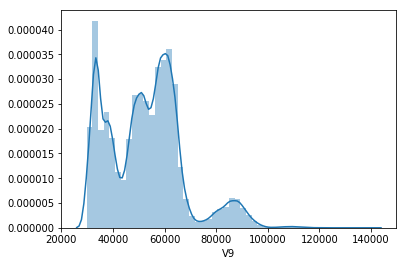

In [49]:
sns.distplot(df["V9"])

C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


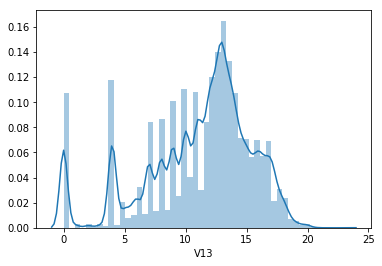

In [50]:
sns.distplot(df["V13"])

C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


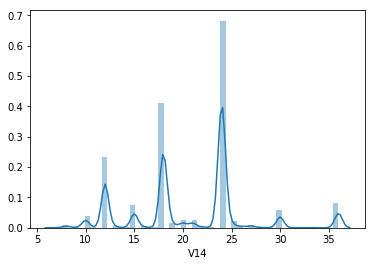

In [51]:
sns.distplot(df["V14"])

C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


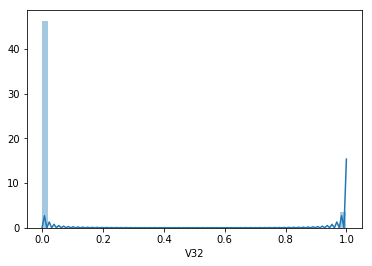

In [57]:
sns.distplot(df["V32"])

In [73]:
lst_coeff=[]
for item in log_model.coef_ :
    lst_coeff.append(item)
lst_coeff

[array([-5.31236865e-03, -1.22736265e-03, -2.70678954e-05, -4.18269065e-06,
        -1.12297689e-02, -5.77190305e-03, -1.95661491e-04,  5.82626833e-05,
        -1.24831151e-07,  1.51416479e-03,  4.83642864e-03,  4.73705663e-03,
         5.88092044e-03, -2.56226381e-04,  1.45810484e-03,  5.17954757e-04,
        -1.12994431e-07,  1.34831421e-05, -2.09534642e-07, -1.26580077e-03,
         4.14365818e-04,  3.89352612e-03,  8.34254477e-03, -3.33507401e-02,
        -4.17615130e-04,  1.13354177e-06, -8.91641073e-04, -8.07510471e-05,
         1.01740416e-03, -1.94641195e-03, -4.22507896e-05, -2.29262340e-05,
        -3.52943145e-04, -5.95389199e-04,  7.44801826e-04])]

In [82]:
y = (df.drop(["V32"],axis=1).columns)
y

Index(['V5', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'V29', 'V30', 'V31', 'age', 'MALE', 'OWENED BY OFFICE', 'OWNED', 'RENT',
       'MC', 'MO', 'SC', 'F', 'L', 'M', 'NON-CASH'],
      dtype='object')

In [115]:
coeff = [-5.31236865e-03, -1.22736265e-03, -2.70678954e-05, -4.18269065e-06,
        -1.12297689e-02, -5.77190305e-03, -1.95661491e-04,  5.82626833e-05,
        -1.24831151e-07,  1.51416479e-03,  4.83642864e-03,  4.73705663e-03,
         5.88092044e-03, -2.56226381e-04,  1.45810484e-03,  5.17954757e-04,
        -1.12994431e-07,  1.34831421e-05, -2.09534642e-07, -1.26580077e-03,
         4.14365818e-04,  3.89352612e-03,  8.34254477e-03, -3.33507401e-02,
        -4.17615130e-04,  1.13354177e-06, -8.91641073e-04, -8.07510471e-05,
         1.01740416e-03, -1.94641195e-03, -4.22507896e-05, -2.29262340e-05,
        -3.52943145e-04, -5.95389199e-04,  7.44801826e-04]
coeff_abs=[]
for item in coeff:
    coeff_abs.append(item)

In [116]:
labels=['V5', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'V29', 'V30', 'V31', 'age', 'MALE', 'OWENED BY OFFICE', 'OWNED', 'RENT',
       'MC', 'MO', 'SC', 'F', 'L', 'M', 'NON-CASH']

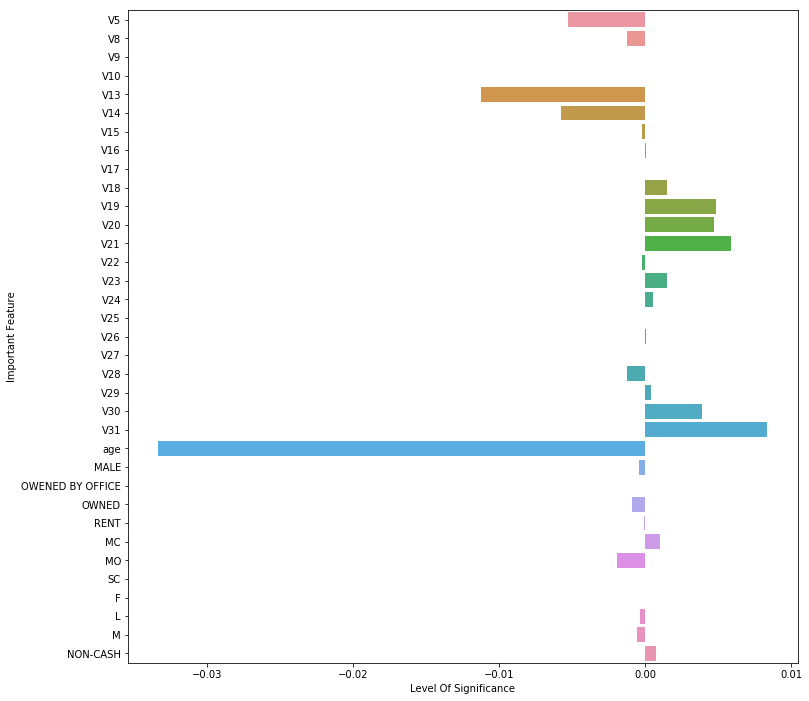

In [129]:
plt.subplots(figsize=(12,12))
plt.xlabel("Level Of Significance")
plt.ylabel("Important Feature")
g = sns.barplot(y=labels,x=coeff)
plt.savefig("GRAPH.png",dpi=600)
# for index, row in df_coeff.iterrows():
#     g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

In [108]:
coeff_abs=[]
for item in coeff:
    coeff_abs.append(abs(item))
coeff_abs.sort(reverse=True)

In [109]:
print(coeff_abs)

[0.0333507401, 0.0112297689, 0.00834254477, 0.00588092044, 0.00577190305, 0.00531236865, 0.00483642864, 0.00473705663, 0.00389352612, 0.00194641195, 0.00151416479, 0.00145810484, 0.00126580077, 0.00122736265, 0.00101740416, 0.000891641073, 0.000744801826, 0.000595389199, 0.000517954757, 0.00041761513, 0.000414365818, 0.000352943145, 0.000256226381, 0.000195661491, 8.07510471e-05, 5.82626833e-05, 4.22507896e-05, 2.70678954e-05, 2.2926234e-05, 1.34831421e-05, 4.18269065e-06, 1.13354177e-06, 2.09534642e-07, 1.24831151e-07, 1.12994431e-07]


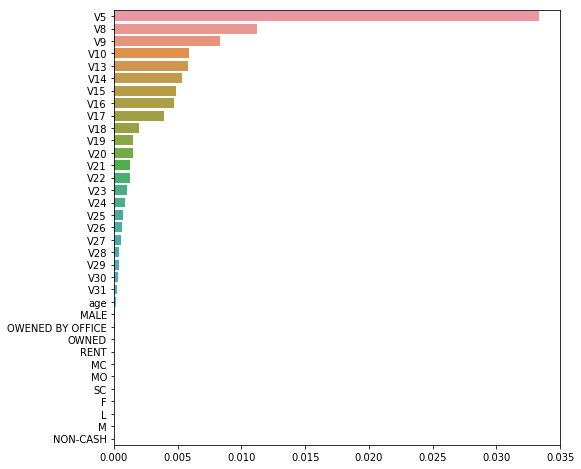

In [110]:
plt.subplots(figsize=(8,8))
sns.barplot(y=labels,x=coeff_abs)

In [125]:
df_coeff = pd.DataFrame(data=coeff,index=labels)

In [126]:
df_coeff.sort_values

<bound method DataFrame.sort_values of                              0
V5               -5.312369e-03
V8               -1.227363e-03
V9               -2.706790e-05
V10              -4.182691e-06
V13              -1.122977e-02
V14              -5.771903e-03
V15              -1.956615e-04
V16               5.826268e-05
V17              -1.248312e-07
V18               1.514165e-03
V19               4.836429e-03
V20               4.737057e-03
V21               5.880920e-03
V22              -2.562264e-04
V23               1.458105e-03
V24               5.179548e-04
V25              -1.129944e-07
V26               1.348314e-05
V27              -2.095346e-07
V28              -1.265801e-03
V29               4.143658e-04
V30               3.893526e-03
V31               8.342545e-03
age              -3.335074e-02
MALE             -4.176151e-04
OWENED BY OFFICE  1.133542e-06
OWNED            -8.916411e-04
RENT             -8.075105e-05
MC                1.017404e-03
MO               -1.946412e-03
